In [57]:
import pandas as pd
import multiprocessing
import gensim
import sys
import seaborn as sns

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm


def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(model[word[0]] - model[word[1]]))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def projection(word, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(normalize(word), culturev))


def cosine2angle(i):
    return np.arccos(i) / np.pi * 180

swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
#     ['happy', 'unhappy'],
#     ['glad', 'sad'],
#     ['joy', 'sorrow'],
    ['smile', 'tear'],
    ['happiness', 'sad']
] # success words

In [2]:
with open('./male.txt') as f:
    male_names_list = [i.strip('\n').lower() for i in f.readlines()]
    
with open('./female.txt') as f:
    female_names_list = [i.strip('\n').lower() for i in f.readlines()]

In [3]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format(
    './english_fiction_sgns_gensim_1990.txt', binary=False)

NameError: name 'cultureD2' is not defined

In [16]:
success_vector = cultureD2(model, swords)
success_words = [i[0] for i in model.similar_by_vector(success_vector, 200)]

['success', 'failure']
['succeed', 'fail']
['lucky', 'unlucky']
['fortunate', 'unfortunate']
['smile', 'tear']
['happiness', 'sad']


/Users/zhicongchen/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/zhicongchen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.float64' object is not iterable

In [6]:
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()

corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
corpus = [i for i in corpus if i != []]

n_split = 6
corpus = [corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)] for i in range(n_split)]

film_script_wordlist = tknzr.tokenize(film_script_str.lower())

NameError: name 'film_script_str' is not defined

In [97]:
film_name_list = (set(film_script_wordlist) & set(male_names_list)) |\
                    (set(film_script_wordlist) & set(female_names_list))
film_script_wordlist_counter = Counter(film_script_wordlist)
film_name_count_df = pd.DataFrame([[i, film_script_wordlist_counter[i]]for i in film_name_list]\
                                  , columns=['name', 'count'])
lead = film_name_count_df.sort_values(by='count', ascending=False)['name'].values[0]

In [103]:
model = Word2Vec(c, size=300, window=10, min_count=1,
                    workers=multiprocessing.cpu_count(), hs=1, negative=0) # negative sampling, hs: hierarchical softmax


RuntimeError: you must first build vocabulary before training the model

In [93]:
print(len(set(success_words) & set(film_script_wordlist)))

64


In [94]:
for i in success_words:
    condition = 0
    for j in range(n_split):
        if i in {item for sublist in corpus[j] for item in sublist}:
            condition += 1 
    if condition == 8:
        success_word = i
        break

In [95]:
# corpus is a list of list of string(word)
# eg:
# corpus = [["cat", "say", "meow"], ["dog", "say", "woof"]]

# 300 dimensions

angles = []
for i in corpus:
    model = Word2Vec(i, size=300, window=10, min_count=1,
                workers=multiprocessing.cpu_count(), hs=1, negative=0) # negative sampling, hs: hierarchical softmax
    angles.append(90 - cosine2angle(projection(model['solomon'], model[success_word])))

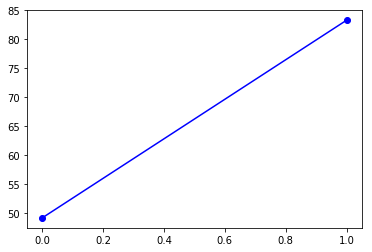

In [82]:
plt.plot(angles, 'bo-')

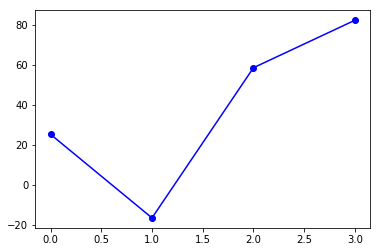

In [86]:
plt.plot(angles, 'bo-')

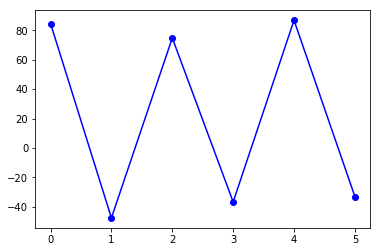

In [96]:
plt.plot(angles, 'bo-')

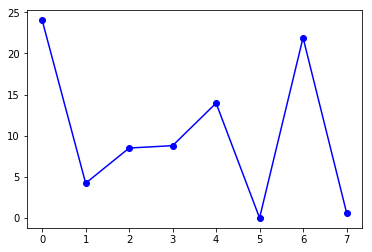

In [77]:
plt.plot(angles, 'bo-')

In [291]:
from glob import glob
angles = []

n_split = 3
count = 0
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()

topmovie_list = ['Forrest-Gump', 'Inception', 'Schindler\'s-List', 'Pulp-Fiction', 'Godfather', 'Shawshank-Redemption,-The']

for file in glob('./imsdb/*')[:200]:
# for movie in topmovie_list:
#     file = './imsdb/' + movie + '.txt'
    flushPrint(count)
    
    with open(file) as f:
        film_script_list = f.readlines()
    film_script_str = ''.join(film_script_list)

    corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
    corpus = [i for i in corpus if i != []]
    corpus = [np.array(corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)]) for i in range(n_split)]

    film_script_wordlist = tknzr.tokenize(film_script_str.lower())

    film_name_list = (set(film_script_wordlist) & set(male_names_list)) |\
                        (set(film_script_wordlist) & set(female_names_list))
    film_script_wordlist_counter = Counter(film_script_wordlist)
    film_name_count_df = pd.DataFrame([[i, film_script_wordlist_counter[i]]for i in film_name_list]\
                                      , columns=['name', 'count'])
    lead = film_name_count_df.sort_values(by='count', ascending=False)['name'].values[0]

    for i in success_words:
        condition = 0
        for j in range(n_split):
            if i in {item for sublist in corpus[j] for item in sublist}:
                condition += 1 
        if condition == n_split:
            success_word = i
            break

    anglesi = []
    try:
        for corpus_line in corpus:
            model = Word2Vec(corpus_line, size=300, window=10, min_count=1, sample=1,
                        workers=multiprocessing.cpu_count(), hs=1, negative=0) # negative sampling, hs: hierarchical softmax
            anglesi.append(90 - cosine2angle(projection(model[lead], model[success_word])))
    except Exception as e:
        print(e)
        print(file, 'wrong')
        pass

    if lead in male_names_list:
        angles.append([anglesi, file, lead, 'male'])
    else:
        angles.append([anglesi, file, lead, 'female'])
    count += 1

76"word 'robinson' not in vocabulary"
./imsdb/Sneakers.txt wrong
83"word 'selena' not in vocabulary"
./imsdb/Collateral-Damage.txt wrong
84"word 'melina' not in vocabulary"
./imsdb/Total-Recall.txt wrong
88"word 'flemming' not in vocabulary"
./imsdb/Beavis-and-Butt-head-Do-America.txt wrong
89you must first build vocabulary before training the model
./imsdb/Shadow-of-the-Vampire.txt wrong
104"word 'smile' not in vocabulary"
./imsdb/Jeux-Interdits.txt wrong
109"word 'eddie' not in vocabulary"
./imsdb/8MM.txt wrong
118"word 'thank' not in vocabulary"
./imsdb/Ni-vu-ni-connu.txt wrong
143"word 'cy' not in vocabulary"
./imsdb/Candle-to-Water.txt wrong
199

In [ ]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)
(0, 2)

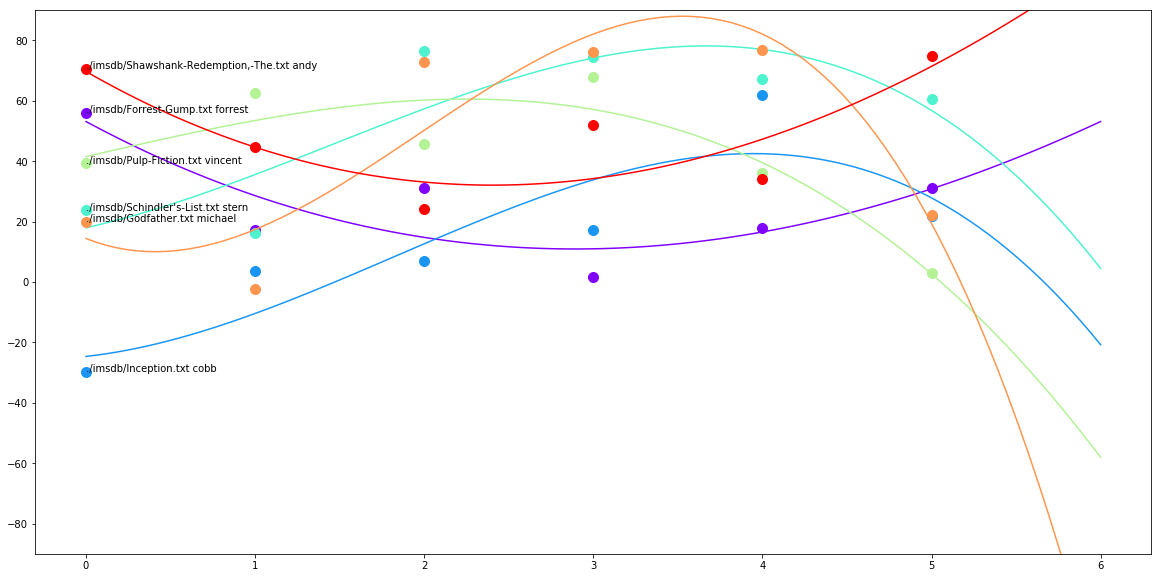

In [216]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
for i in angles:
#     print(i[0])
    x = np.array(np.arange(n_split))
    y = np.array(i[0])
    plt.plot(x,y,'o', color=colors[angles.index(i)], markersize=10, alpha=0.3)
    xp = np.linspace(0, n_split, 100)
    p30 = np.poly1d(np.polyfit(x, y, 3))
    plt.plot(xp, p30(xp), '-', color=colors[angles.index(i)])
    plt.text(0, i[0][0], i[1]+' '+i[2])
    plt.ylim(-90,90)


In [226]:
i

[[], './imsdb/Gamer.txt', 'simon']

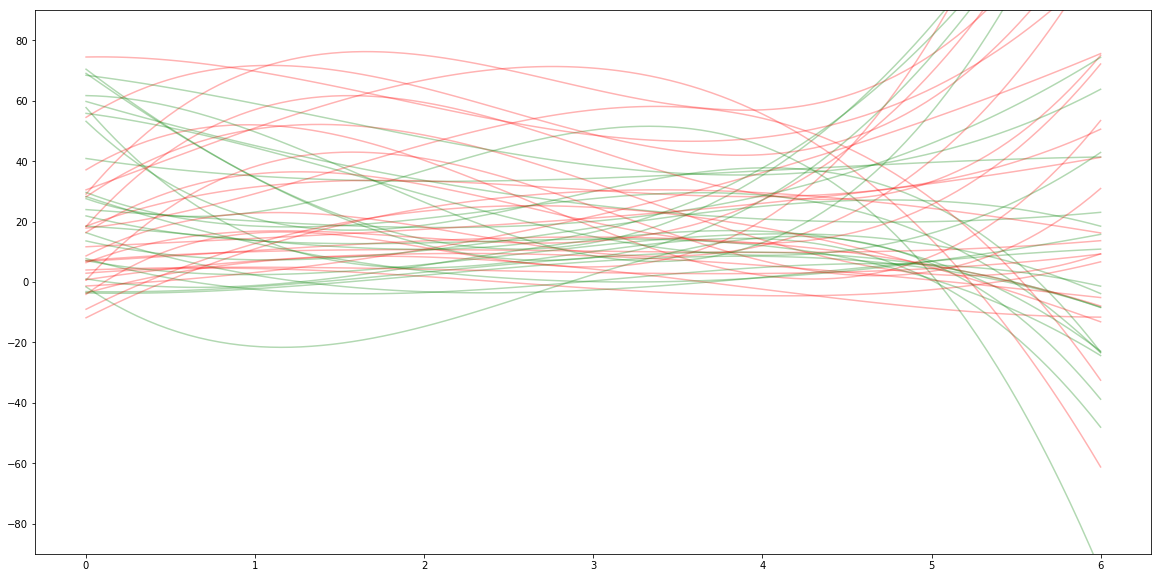

In [233]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('rainbow')
colors = 'grey'
for i in angles:
    if i[0] != []:
    #     print(i[0])
        x = np.array(np.arange(n_split))
        y = np.array(i[0])
#         plt.plot(x,y,'o', color='g', markersize=10, alpha=0.3)
        xp = np.linspace(0, n_split, 100)
        p30 = np.poly1d(np.polyfit(x, y, 3))
        if p30[1] > 0:
            plt.plot(xp, p30(xp), '-', color='r', alpha=0.3)
        else:
            plt.plot(xp, p30(xp), '-', color='g', alpha=0.3)
    #     plt.text(0, i[0][0], i[1]+' '+i[2])
        plt.ylim(-90,90)


In [295]:
x,y

(array([0, 1, 2]), array([74.43162171, 18.00580698]))

(80, 90)

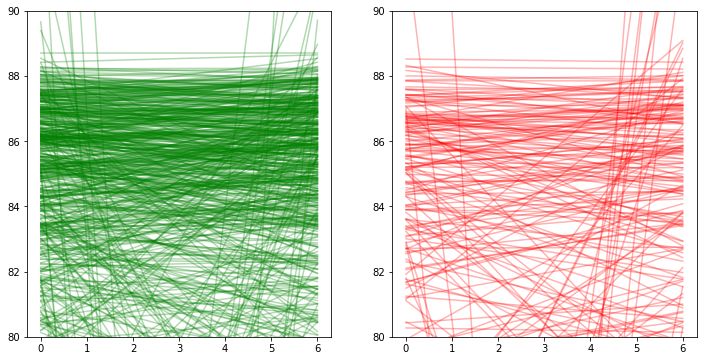

In [342]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
male_upcount = 0
female_upcount = 0
male_downcount = 0
female_downcount = 0
for i in angles:
    # print(i)
    if i[0] != []:
        if len(i[0]) == 6:
            
    #     print(i[0])
            x = np.array(np.arange(n_split))
            y = np.array(i[0])
    #         plt.plot(x,y,'o', color='g', markersize=10, alpha=0.3)
            xp = np.linspace(0, n_split, 100)
            p30 = np.poly1d(np.polyfit(x, y, 1))
            a = np.polyfit(x, y, 1)[0]
            
            if i[3] == 'male':
                if a > 0:
                    male_upcount += 1
                    ax1.plot(xp, p30(xp), '-', color='g', alpha=0.3)
                else:
                    male_downcount += 1
                    ax1.plot(xp, p30(xp), '-', color='g', alpha=0.3)
            else:
                if a > 0:
                    female_upcount += 1
                    ax2.plot(xp, p30(xp), '-', color='r', alpha=0.3)
                else:
                    female_downcount += 1
                    ax2.plot(xp, p30(xp), '-', color='r', alpha=0.3)
            
ax1.set_ylim(80,90)
ax2.set_ylim(80,90)
# ax1.set_xlim(-90,90)
# ax2.set_xlim(-90,90)

In [343]:
print(male_upcount / (male_upcount + male_downcount), (male_upcount), male_downcount)
print(female_upcount / (female_upcount + female_downcount), (female_upcount), female_downcount)

0.46102150537634407 343 401
0.5021459227467812 117 116


ValueError: min() arg is an empty sequence

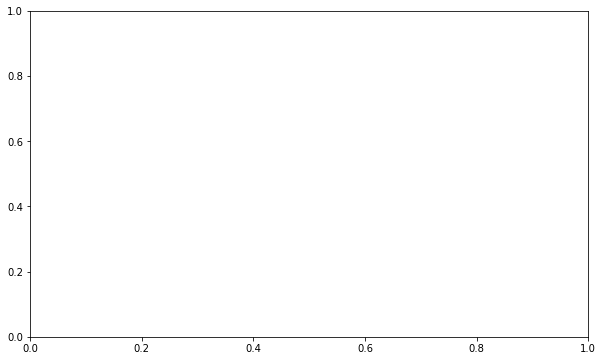

In [84]:
angles_df = []
for i in angles:
    if len(i) == 10:
        for j in range(n_split):
            angles_df.append([j, i[j]])


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# sns.boxplot(x='n_split', y='y', data=pd.DataFrame(angles_df, columns=['n_split', 'y']))
# sns.factorplot(x='n_split', y='y', data=pd.DataFrame(angles_df, columns=['n_split', 'y']), ax=ax, capsize=.2)
plt.tight_layout()

In [341]:
from glob import glob
angles = []

n_split = 6
count = 0
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()

topmovie_list = ['Forrest-Gump', 'Inception', 'Schindler\'s-List', 'Pulp-Fiction', 'Godfather', 'Shawshank-Redemption,-The']

for file in glob('./imsdb/*')[:1000]:
# for movie in topmovie_list:
#     file = './imsdb/' + movie + '.txt'

#     with open(glob('./imsdb/*')[0]) as f:
#         film_script_list = f.readlines()


    with open(file) as f:
        film_script_list = f.readlines()
#     film_script_str = ''.join(film_script_list)
    film_script_str = ''.join(film_script_list)
    corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
    corpus = [i for i in corpus if i != []]
    model = Word2Vec(corpus, size=300, window=10, min_count=1, sample=1,
                            workers=multiprocessing.cpu_count(), hs=1, negative=0) # negative sampling, hs: hierarchical softmax
    model.save("word2vec.model")

    flushPrint(count)
    
    with open(file) as f:
        film_script_list = f.readlines()
    film_script_str = ''.join(film_script_list)

    corpus = [tknzr.tokenize(i.lower()) for i in film_script_str.split('\n')]
    corpus = [i for i in corpus if i != []]
    corpus = [np.array(corpus[int(len(corpus)/n_split*i):int(len(corpus)/n_split*(i+1)-1)]) for i in range(n_split)]

    film_script_wordlist = tknzr.tokenize(film_script_str.lower())

    film_name_list = (set(film_script_wordlist) & set(male_names_list)) |\
                        (set(film_script_wordlist) & set(female_names_list))
    film_script_wordlist_counter = Counter(film_script_wordlist)
    film_name_count_df = pd.DataFrame([[i, film_script_wordlist_counter[i]]for i in film_name_list]\
                                      , columns=['name', 'count'])
    lead = film_name_count_df.sort_values(by='count', ascending=False)['name'].values[0]

    for i in success_words:
        condition = 0
        for j in range(n_split):
            if i in {item for sublist in corpus[j] for item in sublist}:
                condition += 1 
        if condition == n_split:
            success_word = i
            break

    anglesi = []
    try:
        for corpus_line in corpus:
#             print(corpus_line)
            model = Word2Vec.load('./word2vec.model')
            model.train(corpus_line, total_examples=2, epochs=1)
            # print(model.wv.vocab)
            anglesi.append(90 - cosine2angle(projection(model[lead], model[success_word])))
    except Exception as e:
        print(e)
        print(file, 'wrong')
        pass

    if lead in male_names_list:
        angles.append([anglesi, file, lead, 'male'])
    else:
        angles.append([anglesi, file, lead, 'female'])
    count += 1

76"word 'good' not in vocabulary"
./imsdb/Sneakers.txt wrong
89"word 'we' not in vocabulary"
./imsdb/Shadow-of-the-Vampire.txt wrong
104"word 'smile' not in vocabulary"
./imsdb/Jeux-Interdits.txt wrong
118"word 'good' not in vocabulary"
./imsdb/Ni-vu-ni-connu.txt wrong
205"word 'smile' not in vocabulary"
./imsdb/Les-Tontons-Flingueurs.txt wrong
217"word 'thank' not in vocabulary"
./imsdb/Le-Diable-par-la-Queue.txt wrong
258"word 'good' not in vocabulary"
./imsdb/Apollo-13.txt wrong
309"word 'we' not in vocabulary"
./imsdb/Scary-Movie-2.txt wrong
327"word 'smile' not in vocabulary"
./imsdb/Jade.txt wrong
450"word 'smile' not in vocabulary"
./imsdb/Equilibrium.txt wrong
583"word 'few' not in vocabulary"
./imsdb/Officer-and-a-Gentleman,-An.txt wrong
655"word 'good' not in vocabulary"
./imsdb/Vertigo.txt wrong
675"word 'good' not in vocabulary"
./imsdb/When-Harry-Met-Sally.txt wrong
692"word 'smile' not in vocabulary"
./imsdb/Mr.-Holland's-Opus.txt wrong
751"word 'we' not in vocabulary"
./

In [307]:
help(model.train)

Help on method train in module gensim.models.word2vec:

train(sentences, total_examples=None, total_words=None, epochs=None, start_alpha=None, end_alpha=None, word_count=0, queue_factor=2, report_delay=1.0, compute_loss=None) method of gensim.models.word2vec.Word2Vec instance
    Update the model's neural weights from a sequence of sentences (can be a once-only generator stream).
    For Word2Vec, each sentence must be a list of unicode strings. (Subclasses may accept other examples.)
    
    To support linear learning-rate decay from (initial) alpha to min_alpha, and accurate
    progres-percentage logging, either total_examples (count of sentences) or total_words (count of
    raw words in sentences) MUST be provided. (If the corpus is the same as was provided to
    `build_vocab()`, the count of examples in that corpus will be available in the model's
    `corpus_count` property.)
    
    To avoid common mistakes around the model's ability to do multiple training passes itself, an

[0 1 2 3 4 5] [84.03385602 84.21503929 84.42103544 86.96365148 86.98409366 87.27947475]
[0 1 2 3 4 5] [87.90146209 87.99035776 86.94328184 85.01103738 86.05900988 84.79082655]
[0 1 2 3 4 5] [83.42409752 84.03063698 83.84820511 87.07503874 88.12132242 87.91521669]
[0 1 2 3 4 5] [87.25561963 87.75571582 85.77891062 84.1419427  84.59593275 81.17307446]


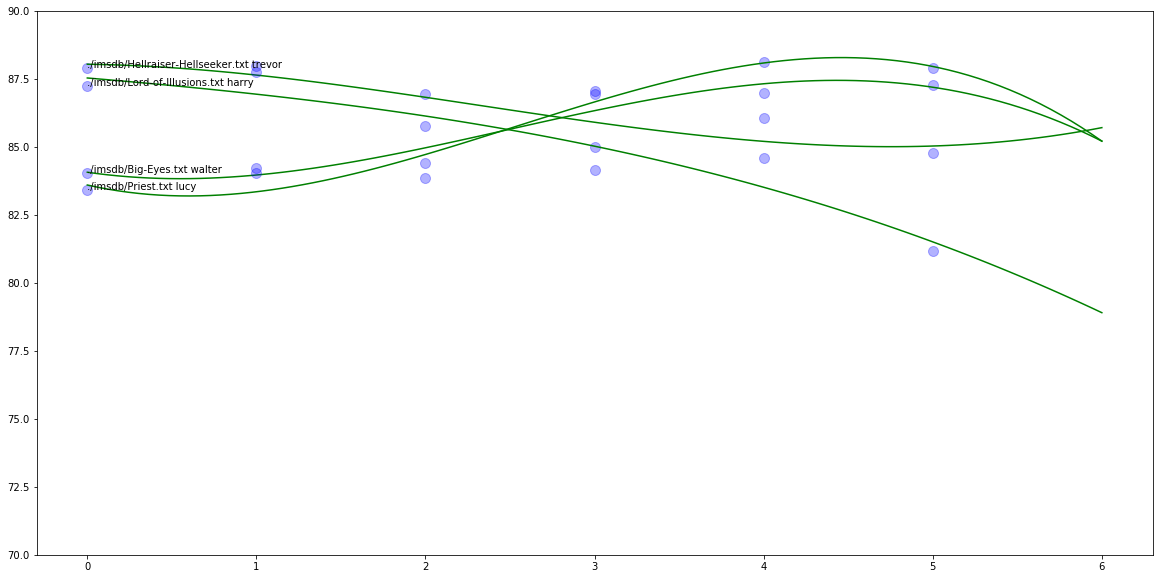

In [284]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
for i in angles:
#     print(i[0])
    if i[0] != []:
        x = np.array(np.arange(n_split))
        y = np.array(i[0])
        print(x, y)
        plt.plot(x,y,'o', color='b', markersize=10, alpha=0.3)
        xp = np.linspace(0, n_split, 100)
        p30 = np.poly1d(np.polyfit(x, y, 3))
        plt.plot(xp, p30(xp), '-', color='g')
        plt.text(0, i[0][0], i[1]+' '+i[2])
        plt.ylim(70,90)


In [276]:
angles

[[[], './imsdb/Midnight-Express.txt', 'billy', 'male'],
 [[84.03385602213852,
   84.2150392932804,
   84.42103544427381,
   86.96365148320584,
   86.98409366154489,
   87.27947474771156],
  './imsdb/Big-Eyes.txt',
  'walter',
  'male'],
 [[], './imsdb/Warrior.txt', 'brendan', 'male'],
 [[87.90146208862534,
   87.99035775841605,
   86.94328184280428,
   85.01103738252861,
   86.05900988042887,
   84.7908265528867],
  './imsdb/Hellraiser-Hellseeker.txt',
  'trevor',
  'male'],
 [[], './imsdb/Hannah-and-Her-Sisters.txt', 'mickey', 'male'],
 [[], './imsdb/Graduate,-The.txt', 'ben', 'male'],
 [[], './imsdb/Collateral.txt', 'max', 'male'],
 [[], './imsdb/Cinema-Paradiso.txt', 'salvatore', 'male'],
 [[83.42409751674926,
   84.0306369841215,
   83.84820511125544,
   87.07503873719928,
   88.12132241819396,
   87.91521668833246],
  './imsdb/Priest.txt',
  'lucy',
  'female'],
 [[], './imsdb/Aladdin.txt', 'jasmine', 'female'],
 [[], './imsdb/Inventing-the-Abbotts.txt', 'doug', 'male'],
 [[], './